In [1]:
# https://valueml.com/learning-to-classify-wines-using-scikit-learn/
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import check_random_state
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

import concurrent.futures

In [2]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_scaled = preprocessing.scale(X_train)

## Linear Kernel

In [3]:
# Create a svm Classifier
clf = svm.SVC(kernel='linear') 

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Polynomial Kernel

In [ ]:
# Create a svm Classifier
clf = svm.SVC(kernel='poly') 

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


## Radial Basis Kernel

In [ ]:
# Create a svm Classifier
clf = svm.SVC(kernel='rbf') 

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4166666666666667


Text(0.5, 1.0, 'Accuracy vs Gamma')

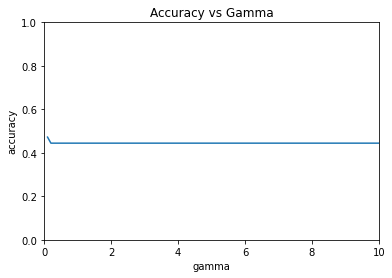

In [ ]:
def rbc_svc(gamma):
    clf = svm.SVC(kernel='rbf', gamma=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

In [ ]:
x = [i / 10 for i in range(1, 101)]
accuracy = []

with concurrent.futures.ProcessPoolExecutor() as executor:
    for i in executor.map(rbc_svc, x):
        accuracy.append(i)

In [ ]:
plt.plot(x, accuracy)
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Accuracy vs Gamma')

# Why is this? Higher gamma should overfit